# Project: Wrangling and Analyze Data

## Data Gathering

Load the twitter_archive_enhanced file

In [1]:
import pandas as pd

tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_predictions = pd.read_csv(url, sep="\t")

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
import time

tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.perf_counter()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile, ensure_ascii=False)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.perf_counter()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [4]:
import json

In [5]:
tweepy_api = pd.read_json('tweet_json.txt', lines=True)
tweepy_api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33727,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6979,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29257,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5281,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21990,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3466,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36822,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7201,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35217,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7723,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data

In [6]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


The source column contains html tags instead of actual sources.

The null values in columns name, doggo, floofer, pupper and puppo are None instead of nan

Dog names in rows 56, 335, 649 and 759 should be nan and dog names in rows 369, 684, 777 and 852 are wrong.

Dog rating in row 518, 1070, 1167 and 1204 is wrong.

In [7]:
tweet_archive.retweeted_status_id.nunique()

181

181 of the tweets in the database are retweets.

In [8]:
tweet_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Timestamp is an object instead of a datetime64.

Id column is an integer.

In [9]:
tweepy_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
id                               2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

Contributors and coordinates columns are completely empty.

Id column is an integer.

In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Capitalization of dog breeds in p1, p2 and p3 columns is not standardized.

### Quality issues
1. Some tweets in the tweet_archive dataframe are retweets.

2. The timestamp in the tweet_archive dataframe is a string not a datetime64.

3. The cells in the source column of both tweet_archive and tweepy_api contain html tags not devices or actual sources.

4. The null values in the name, doggo, floofer, pupper and puppo columns in tweet_archive are None instead of NaN.

5. There are null columns in tweepy_api.

6. Names of the dogs in row 56, 335, 649 and 759 should be Nan and names of dogs in row 369,684,777 and 852 are wrong.

7. Id columns in all three dataframes are integers instead of strings.

8. Rating in row 1068, 1165 and 1202 is wrong and row 516 has no rating.

9. The capitalization of dog breeds in image_predictions p1, p2 and p3 columns is not standardized.

### Tidiness issues
1. The hashtag, symbols and user mentions are in the same columns.

2. The doggo, floofer, pupper and puppo columns should be  single column.

3. All three dataframes contain the same observation.

## Cleaning Data

In [11]:
# Make copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
image_predictions_clean = image_predictions.copy()
tweepy_api_clean = tweepy_api.copy()

### Issue #1:

#### Define:
Redefine the tweet_archive_clean to only include original tweets.

#### Code

In [12]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [13]:
tweet_archive_clean.retweeted_status_id.unique()

array([ nan])

### Issue #2:

#### Define:
Convert the strings in the tweet_archive_clean's timestamp column to datetime64.

#### Code

In [14]:
tweet_archive_clean.timestamp = tweet_archive_clean.timestamp.astype('datetime64')

#### Test

In [15]:
tweet_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #3:

#### Define:
Extract device from the html tag in source col of tweet_archive and tweepy_api.

#### Code:

In [16]:
sources = tweet_archive_clean.source.unique()
mydict = {sources[0]:'iphone', sources[1]:'web_client', sources[2]:'vine', sources[3]:'tweet_deck'}

for source in sources:
    tweet_archive_clean.source.replace(source, mydict[source], inplace=True)
    tweepy_api_clean.source.replace(source, mydict[source], inplace=True)

#### Test

In [17]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
tweepy_api_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33727,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6979,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29257,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5281,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21990,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3466,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36822,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7201,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35217,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7723,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #4

#### Define:
Covert None in name, doggo, floofer, pupper and puppo column to NaN

#### Code:

In [19]:
import numpy as np
def replace_funct(col):
    tweet_archive_clean[col].replace('None', np.nan, inplace=True)

In [20]:
cols = ['name', 'puppo', 'doggo', 'floofer', 'pupper']

for col in cols:
    replace_funct(col)

#### Test

In [21]:
tweet_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,iphone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,iphone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


### Issue #5

#### Define:


Drop the null columns in tweepy_api

#### Code:

In [22]:
cols = ['contributors', 'coordinates', 'geo']
tweepy_api_clean.drop(cols, axis = 1, inplace=True)

#### Test

In [23]:
tweepy_api_clean

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33727,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,None,...,NaN,NaN,NaN,NaN,6979,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29257,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,None,...,NaN,NaN,NaN,NaN,5281,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21990,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,...,NaN,NaN,NaN,NaN,3466,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36822,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,...,NaN,NaN,NaN,NaN,7201,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35217,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,...,NaN,NaN,NaN,NaN,7723,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17760,False,Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,None,...,NaN,NaN,NaN,NaN,2590,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10341,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991424,None,...,NaN,NaN,NaN,NaN,1649,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56705,False,When you watch your owner call another dog a g...,890729181411237888,890729181411237888,None,...,NaN,NaN,NaN,NaN,15698,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",24459,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,890609185150312448,None,...,NaN,NaN,NaN,NaN,3605,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",27876,False,This is Cassie. She is a college pup. Studying...,890240255349198849,890240255349198848,None,...,NaN,NaN,NaN,NaN,6083,False,NaN,iphone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Issue #6:

#### Define:

Reassign the names in 56, 649 and 335 as nan and reassign names in rows 369, 775, 852 with correct names.

#### Code:

In [24]:
def rename_dog(row, new_name):
    tweet_archive_clean.at[row,'name'] = new_name

In [25]:
rename_dog(56, np.nan)

In [26]:
rename_dog(649, np.nan)

In [27]:
rename_dog(335, np.nan)

In [28]:
rename_dog(369, 'Grace')

In [29]:
rename_dog(775, "O'Malley")

In [30]:
rename_dog(852, 'Zoey')

#### Test

In [31]:
tweet_archive_clean.loc[[56,649,335,369, 775,852],['name']]

,name
56,NaN
649,NaN
335,NaN
369,Grace
775,O'Malley
852,Zoey


### Issue #7

#### Define:

Convert id columns to strings

#### Code:

In [32]:
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype('str')

In [33]:
tweepy_api_clean.id = tweepy_api_clean.id.astype('str')

In [ ]:
tweepy_api_clean.id_str = tweepy_api_clean.id_str.astype('str')

In [34]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [35]:
tweet_archive_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [36]:
tweepy_api_clean.dtypes

created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
id                                       object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      float64
possibly_sensitive_appealable           float64
quoted_status                            object
quoted_status_id                        

In [37]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #8:

#### Define

Reassign the ratings in 516, 1070, 1167 and 1204 with the correct ratings and drop row 516.

#### Code

In [38]:
tweet_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [39]:
def correct_rating(row, num, den):
    tweet_archive_clean.at[row, 'rating_numerator'] = num
    tweet_archive_clean.at[row, 'rating_denominator'] = den

In [40]:
correct_rating(1068, 14,10)

In [41]:
correct_rating(1165, 13,10)

In [42]:
correct_rating(1202, 11,10)

In [43]:
tweet_archive_clean.drop(516, 0, inplace=True)

#### Test

In [44]:
tweet_archive_clean.loc[[1068, 1165, 1202],['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1068,14,10
1165,13,10
1202,11,10


In [45]:
try:
    tweet_archive_clean.at[516, 'rating_numerator']
except:
    print(0)

0


### Issue #9

#### Define

Lower all the characters in the p1, p2 and p3 columns in image_predictions_clean.

#### Code

In [46]:
def lower_letters(col):
    image_predictions_clean[col] = image_predictions_clean[col].str.lower()

In [47]:
lower_letters('p1')

In [48]:
lower_letters('p2')

In [49]:
lower_letters('p3')

#### Test

In [50]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Tidying the data

### Issue #1

#### Define:

Seperate the entities in the entities column of the tweepy_api dataframe

#### Code:

In [51]:
#seperate the entities in entities column.
keys = ['hashtags', 'symbols', 'user_mentions', 'urls', 'media']

hashtags = []
symbols = []
user_mentions = []
urls = []
media = []

cols = [hashtags, symbols, user_mentions, urls, media]

def populate_entity_col(key, col, column):
    for i in tweepy_api_clean[column]:
        try:
            col.append(i[key])
        except:
            col.append(np.nan)
        
for i in range(5):
    populate_entity_col(keys[i], cols[i], 'entities')

In [52]:
for i in range(5):
    tweepy_api_clean[keys[i]] = cols[i]

In [53]:
#seperate the entities in the media column.

keys = ['id', 'id_str', 'indices', 'media_url', 'media_url_https', 'url', 'display_url', 'expanded_url', 'type', 'sizes']
Id = []
id_str = []
indices = []
media_url = []
media_url_https = []
url = []
display_url = []
expanded_url = []
Type = []
sizes = []

cols = [Id, id_str, indices, media_url, media_url_https, url, display_url, expanded_url, Type, sizes]

In [54]:
def populate_media_cols(key, col, column):
    for i in tweepy_api_clean[column]:
        try:
            col.append(i[0][key])
        except:
            col.append(np.nan)

In [55]:
for i in range(10):
    populate_media_cols(keys[i], cols[i], 'media')

In [56]:
for i in range(10):
    tweepy_api_clean[keys[i]] = cols[i]

In [57]:
#drop the entities and media columns.
tweepy_api_clean.drop(['entities', 'media'], 1, inplace = True)

In [58]:
def repopulate_col(column):
    col = []
    for item in tweepy_api_clean[column].tolist():
        if len(item)==0:
            col.append(np.nan)
        else:
            col.append(item[0])

    tweepy_api_clean[column] = col

In [59]:
repopulate_col('hashtags')

In [60]:
repopulate_col('user_mentions')

In [61]:
repopulate_col('urls')

In [62]:
repopulate_col('symbols')

#### Test

In [63]:
tweepy_api_clean.head()

,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,...,user_mentions,urls,indices,media_url,media_url_https,url,display_url,expanded_url,type,sizes
0,2017-08-01 16:23:56,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...",33727,False,This is Phineas. He's a mystical boy. Only eve...,8.924206e+17,892420639486877696,None,NaN,...,NaN,NaN,"[86, 109]",http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://t.co/MgUWQ76dJU,pic.twitter.com/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643...,photo,"{'thumb': {'w': 150, 'h': 150, 'resize': 'crop..."
1,2017-08-01 00:17:27,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str'...",29257,False,This is Tilly. She's just checking pup on you....,8.921774e+17,892177413194625024,None,NaN,...,NaN,NaN,"[139, 162]",http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://t.co/0Xxu71qeIV,pic.twitter.com/0Xxu71qeIV,https://twitter.com/dog_rates/status/892177421...,photo,"{'thumb': {'w': 150, 'h': 150, 'resize': 'crop..."
2,2017-07-31 00:18:03,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str'...",21990,False,This is Archie. He is a rare Norwegian Pouncin...,8.918152e+17,891815175371796480,None,NaN,...,NaN,NaN,"[122, 145]",http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://t.co/wUnZnhtVJB,pic.twitter.com/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181...,photo,"{'thumb': {'w': 150, 'h': 150, 'resize': 'crop..."
3,2017-07-30 15:58:51,"[0, 79]","{'media': [{'id': 891689552724799489, 'id_str'...",36822,False,This is Darla. She commenced a snooze mid meal...,8.916896e+17,891689552724799489,None,NaN,...,NaN,NaN,"[80, 103]",http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://t.co/tD36da7qLQ,pic.twitter.com/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557...,photo,"{'thumb': {'w': 150, 'h': 150, 'resize': 'crop..."
4,2017-07-29 16:00:24,"[0, 138]","{'media': [{'id': 891327551943041024, 'id_str'...",35217,False,This is Franklin. He would like you to stop ca...,8.913276e+17,891327551943041024,None,NaN,...,NaN,NaN,"[139, 162]",http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,https://t.co/AtUZn91f7f,pic.twitter.com/AtUZn91f7f,https://twitter.com/dog_rates/status/891327558...,photo,"{'medium': {'w': 720, 'h': 540, 'resize': 'fit..."


### Issue #2

#### Define

Merge doggo, floofer, pupper and puppo columns.

#### Code:

In [64]:
tweet_archive_clean.floofer.unique()

array([nan, 'floofer'], dtype=object)

In [65]:
dogtype = tweet_archive_clean['doggo'].combine_first(tweet_archive_clean['floofer']).combine_first(tweet_archive_clean['puppo']).combine_first(tweet_archive_clean['pupper'])

tweet_archive_clean['dogtype'] = dogtype

In [66]:
tweet_archive_clean.drop(['doggo','floofer','pupper', 'puppo'], 1, inplace = True)

#### Test:

In [67]:
tweet_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtype
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #3:

#### Define

Merge the datasets

#### Code

In [68]:
#drop unnecessary columns
cols = ['display_text_range','extended_entities', 'favorited', 'full_text', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'is_quote_status', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id_str', 'quoted_status_permalink', 'retweeted', 'retweeted_status', 'place', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'quoted_status_id', 'truncated', 'user', 'symbols', 'user_mentions', 'urls', 'indices', 'media_url', 'media_url_https', 'url', 'display_url',
       'expanded_url', 'sizes']

tweepy_api_clean.drop(cols, 1, inplace = True)

In [69]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls', 'source']

tweet_archive_clean.drop(cols, 1, inplace=True)

For reasons I am yet to work out, the last 10 characters of the id column are different in the two dataframes. The first 8, however, stay the same and are unique so these will be used to merge the dataframes.

In [71]:
def truncate(x):
    x= x[0:8]
    return x
tweepy_api_clean['truncated_id'] = tweepy_api_clean.id_str.apply(lambda x: truncate(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [72]:
tweet_archive_clean['truncated_id'] = tweet_archive_clean.tweet_id.apply(lambda x: truncate(x))

In [73]:
master = tweet_archive_clean.merge(image_predictions_clean)

In [74]:
master = master.merge(tweepy_api_clean, on='truncated_id')

In [77]:
#Drop duplicated columns.
cols = ['id', 'id_str', 'truncated_id']
master.drop(cols, 1, inplace=True)

#### Test:

In [78]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 25 columns):
tweet_id              440 non-null object
timestamp             440 non-null datetime64[ns]
text                  440 non-null object
rating_numerator      440 non-null int64
rating_denominator    440 non-null int64
name                  305 non-null object
dogtype               50 non-null object
jpg_url               440 non-null object
img_num               440 non-null int64
p1                    440 non-null object
p1_conf               440 non-null float64
p1_dog                440 non-null bool
p2                    440 non-null object
p2_conf               440 non-null float64
p2_dog                440 non-null bool
p3                    440 non-null object
p3_conf               440 non-null float64
p3_dog                440 non-null bool
created_at            440 non-null datetime64[ns]
favorite_count        440 non-null int64
lang                  440 non-null object
retwe

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [61]:
import seaborn as sns

To investigate the relationship between dog age group and rating, a bar chart of the mean rating of each dogtype is plotted:

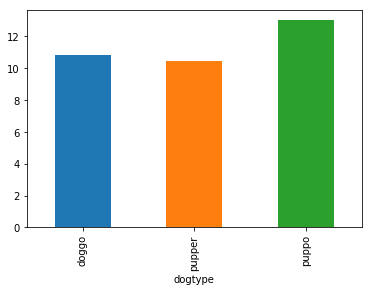

In [80]:
%matplotlib inline

master.groupby('dogtype')['rating_numerator'].mean().plot(kind='bar');

To investigate the relationship between tweet likes and tweet language, a bar chart of the mean favorite count of each language tweet is plotted:

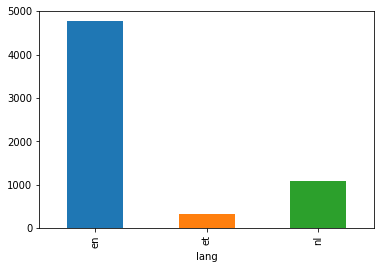

In [81]:
master.groupby('lang')['favorite_count'].mean().plot(kind='bar');

To investigate the relationship between hashtags and tweet likes, categories of tweets with hashtags and those without are made and a bar chart of the mean favorite count of each category is plotted:

In [82]:
#categorize the tweets with hashtags and those without
col = []
for item in master['hashtags'].tolist():
    if pd.isna(item):
        col.append(False)
    else:
        col.append(True)

master['tagged'] = col

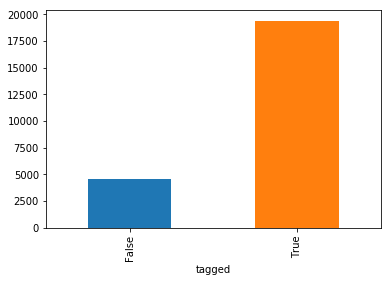

In [83]:
master.groupby('tagged')['favorite_count'].mean().plot(kind='bar');

### Insights:
1. Puppo dogs get the highest rating followed by doggo then pupper dogs.

2. Tweets in the 'en' language get the most likes followed by  those in 'nl'.

3. Tweets with hashtags get on average more likes than those without hashtags.

### Visualization

To visualize the population of each dogtype.

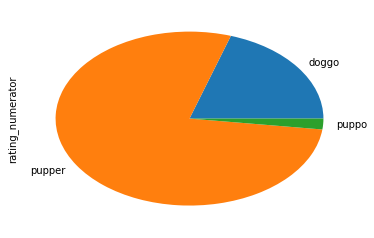

In [84]:
master.groupby('dogtype')['rating_numerator'].count().plot(kind='pie');